In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.1
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_0.1_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_0.1_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.1034

Best Fitness:	702.8159
Solution:	700.0000
Diff:		2.8159

[0:01:10][----------] 1.96% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.9431

Best Fitness:	702.4300
Solution:	700.0000
Diff:		2.4300

[0:01:59][----------] 3.92% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.6027

Best Fitness:	703.6744
Solution:	700.0000
Diff:		3.6744

[0:02:53][#---------] 5.88% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.6721

Best Fitness:	703.1710
Solution:	700.0000
Diff:		3.1710

[0:03:30][#---------] 7.84% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.0390

Best Fitness:	702.5633
Solution:	700.0000
Diff:		2.5633

[0:04:21][#---------] 9.80% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.3686

Best Fitness:	703.1015
Solution:	700.0000
Diff:		3.1015

[0:05:01][#---------] 11.76% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.4241

Best Fitness:	702.7510
Solution:	700.0000
Diff:		2.7510

[0:05:43][#---------] 13.73% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	708.8140

Best Fitness:	703.4059
Solution:	700.0000
Diff:		3.4059

[0:06:20][##--------] 15.69% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.7366

Best Fitness:	703.9220
Solution:	700.0000
Diff:		3.9220

[0:07:15][##--------] 17.65% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.8406

Best Fitness:	703.1731
Solution:	700.0000
Diff:		3.1731

[0:07:54][##--------] 19.61% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	708.9689

Best Fitness:	703.1220
Solution:	700.0000
Diff:		3.1220

[0:08:44][##--------] 21.57% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	711.5573

Best Fitness:	704.2430
Solution:	700.0000
Diff:		4.2430

[0:09:22][##--------] 23.53% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.3411

Best Fitness:	703.2273
Solution:	700.0000
Diff:		3.2273

[0:09:59][###-------] 25.49% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	711.9684

Best Fitness:	704.1379
Solution:	700.0000
Diff:		4.1379

[0:10:59][###-------] 27.45% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	708.3071

Best Fitness:	702.4346
Solution:	700.0000
Diff:		2.4346

[0:11:47][###-------] 29.41% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	711.9976

Best Fitness:	704.0731
Solution:	700.0000
Diff:		4.0731

[0:12:26][###-------] 31.37% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.4132

Best Fitness:	703.9994
Solution:	700.0000
Diff:		3.9994

[0:13:24][###-------] 33.33% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	707.7662

Best Fitness:	702.5911
Solution:	700.0000
Diff:		2.5911

[0:14:09][####------] 35.29% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	708.4608

Best Fitness:	702.8598
Solution:	700.0000
Diff:		2.8598

[0:14:44][####------] 37.25% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.3735

Best Fitness:	703.4871
Solution:	700.0000
Diff:		3.4871

[0:15:41][####------] 39.22% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.6471

Best Fitness:	703.2422
Solution:	700.0000
Diff:		3.2422

[0:16:18][####------] 41.18% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.4576

Best Fitness:	703.6900
Solution:	700.0000
Diff:		3.6900

[0:17:06][####------] 43.14% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	711.5801

Best Fitness:	703.8181
Solution:	700.0000
Diff:		3.8181

[0:17:53][#####-----] 45.10% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.1953

Best Fitness:	701.7065
Solution:	700.0000
Diff:		1.7065

[0:18:48][#####-----] 47.06% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.1043

Best Fitness:	703.2111
Solution:	700.0000
Diff:		3.2111

[0:19:35][#####-----] 49.02% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.0979

Best Fitness:	703.5622
Solution:	700.0000
Diff:		3.5622

[0:20:27][#####-----] 50.98% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	708.8747

Best Fitness:	703.1002
Solution:	700.0000
Diff:		3.1002

[0:21:08][#####-----] 52.94% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	711.3036

Best Fitness:	702.6563
Solution:	700.0000
Diff:		2.6563

[0:21:49][#####-----] 54.90% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	708.7376

Best Fitness:	702.6570
Solution:	700.0000
Diff:		2.6570

[0:22:24][######----] 56.86% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	711.6926

Best Fitness:	703.4954
Solution:	700.0000
Diff:		3.4954

[0:23:07][######----] 58.82% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	707.7204

Best Fitness:	702.6265
Solution:	700.0000
Diff:		2.6265

[0:23:51][######----] 60.78% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.7889

Best Fitness:	702.9114
Solution:	700.0000
Diff:		2.9114

[0:24:31][######----] 62.75% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	711.0818

Best Fitness:	703.9050
Solution:	700.0000
Diff:		3.9050

[0:25:25][######----] 64.71% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.0240

Best Fitness:	702.4905
Solution:	700.0000
Diff:		2.4905

[0:26:15][#######---] 66.67% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.5147

Best Fitness:	702.9768
Solution:	700.0000
Diff:		2.9768

[0:27:07][#######---] 68.63% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	713.1549

Best Fitness:	704.0463
Solution:	700.0000
Diff:		4.0463

[0:27:46][#######---] 70.59% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	712.2630

Best Fitness:	704.1718
Solution:	700.0000
Diff:		4.1718

[0:28:34][#######---] 72.55% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.4150

Best Fitness:	703.9093
Solution:	700.0000
Diff:		3.9093

[0:29:23][#######---] 74.51% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	707.6719

Best Fitness:	702.4726
Solution:	700.0000
Diff:		2.4726

[0:30:18][########--] 76.47% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.1395

Best Fitness:	703.4643
Solution:	700.0000
Diff:		3.4643

[0:30:52][########--] 78.43% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.2262

Best Fitness:	702.5354
Solution:	700.0000
Diff:		2.5354

[0:31:29][########--] 80.39% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.2739

Best Fitness:	702.5511
Solution:	700.0000
Diff:		2.5511

[0:32:07][########--] 82.35% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	711.4320

Best Fitness:	702.3737
Solution:	700.0000
Diff:		2.3737

[0:32:55][########--] 84.31% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.5321

Best Fitness:	703.2462
Solution:	700.0000
Diff:		3.2462

[0:33:41][#########-] 86.27% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.2722

Best Fitness:	702.1462
Solution:	700.0000
Diff:		2.1462

[0:34:28][#########-] 88.24% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	710.1766

Best Fitness:	703.8884
Solution:	700.0000
Diff:		3.8884

[0:35:05][#########-] 90.20% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	713.3713

Best Fitness:	704.0319
Solution:	700.0000
Diff:		4.0319

[0:35:58][#########-] 92.16% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	707.8304

Best Fitness:	702.5866
Solution:	700.0000
Diff:		2.5866

[0:36:41][#########-] 94.12% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	709.4205

Best Fitness:	704.1187
Solution:	700.0000
Diff:		4.1187

[0:37:18][##########] 96.08% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	711.2913

Best Fitness:	702.4094
Solution:	700.0000
Diff:		2.4094

[0:38:00][##########] 98.04% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	707.7343

Best Fitness:	703.0015
Solution:	700.0000
Diff:		3.0015

[0:38:49][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:38:49

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
27,15.529634,8.497593,9.256152,12.824116,7.600246,9.690179,12.299348,9.846675,12.761566,9.341418,...,12.321210,11.060837,9.079117,6.631216,17.559719,8.044444,13.527179,8.917058,5.716203,50
28,15.529634,8.497593,9.256152,12.824116,7.600246,9.690179,11.037933,7.990846,3.769743,9.341418,...,9.456653,10.642532,9.079117,6.631216,12.099605,8.044444,10.857411,8.917058,5.716203,50
29,15.529634,8.497593,8.670365,7.680060,7.600246,9.690179,5.982875,7.083711,3.769743,9.341418,...,9.456653,8.650818,8.552657,6.631216,12.099605,8.044444,10.857411,8.917058,5.616152,50
30,15.529634,8.497593,8.670365,7.680060,7.600246,9.690179,5.982875,7.083711,3.769743,9.341418,...,9.456653,7.723867,8.552657,6.158222,12.099605,8.044444,10.857411,8.917058,5.616152,50
31,13.351921,8.497593,8.670365,7.680060,7.600246,5.988051,5.982875,7.083711,3.769743,4.881068,...,9.456653,7.723867,8.552657,6.158222,11.712868,6.416338,10.857411,8.917058,5.616152,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 2.8158741405823093

Best error for run 1: 2.429989730889247

Best error for run 2: 3.6744189808566716

Best error for run 3: 3.170960286586137

Best error for run 4: 2.5633404896623233

Best error for run 5: 3.1014838592731167

Best error for run 6: 2.7510238885636227

Best error for run 7: 3.4058515826123994

Best error for run 8: 3.9220350088405667

Best error for run 9: 3.173148888130754

Best error for run 10: 3.1219882178446596

Best error for run 11: 4.2430002056794365

Best error for run 12: 3.2273241925635148

Best error for run 13: 4.137897636920798

Best error for run 14: 2.434640038654038

Best error for run 15: 4.0731297653973115

Best error for run 16: 3.9994291157318003

Best error for run 17: 2.5910965711351537

Best error for run 18: 2.8597998227786547

Best error for run 19: 3.4871388016152878

Best error for run 20: 3.2422444692955423

Best error for run 21: 3.6900415027014333

Best error for run 22: 3.818125498199038

Best error for run 23: 1.7064823093439827

Best error for run 24: 3.2111421898835033

Best error for run 25: 3.5622028533721277

Best error for run 26: 3.1001522932143644

Best error for run 27: 2.6562660221196666

Best error for run 28: 2.657035162689567

Best error for run 29: 3.4954404600181306

Best error for run 30: 2.626462244717004

Best error for run 31: 2.9114392801192253

Best error for run 32: 3.9050246370666173

Best error for run 33: 2.4904760159218995

Best error for run 34: 2.9768410045170413

Best error for run 35: 4.046274505487418

Best error for run 36: 4.171793232217624

Best error for run 37: 3.9093457712045847

Best error for run 38: 2.47258238850236

Best error for run 39: 3.4642928092674765

Best error for run 40: 2.5353836034915957

Best error for run 41: 2.551088935482994

Best error for run 42: 2.373683656989897

Best error for run 43: 3.2461845639315925

Best error for run 44: 2.1461563455336545

Best error for run 45: 3.88838450985952

Best error for run 46: 4.031918328941629

Best error for run 47: 2.586626990126206

Best error for run 48: 4.118660909185905

Best error for run 49: 2.4094124710499045

Best error for run 50: 3.0015289865148134

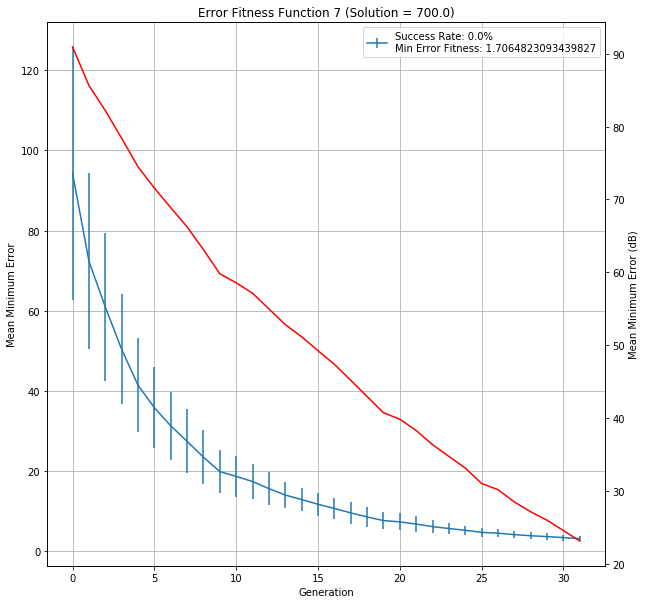

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_0.1_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,0.1,2.815874,2.42999,3.674419,3.17096,2.56334,3.101484,...,2.146156,3.888385,4.031918,2.586627,4.118661,2.409412,3.001529,3.180123,0:38:49,10200
